<a href="https://colab.research.google.com/github/TheOzzyLot/AH2179/blob/main/Module_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

data_df = pd.read_csv("dataset_exercise_5_clustering_highway_traffic.csv",sep=";")
data_df

,PORTAL,Date,time_from,time_to,Interval_5,SPEED_MS_AVG,flow
0,"E4S 56,780",20210101,00:00:00,00:05:00,0,18.56,39
1,"E4S 56,780",20210101,00:05:00,00:10:00,1,20.39,18
2,"E4S 56,780",20210101,00:10:00,00:15:00,2,19.27,26
3,"E4S 56,780",20210101,00:15:00,00:20:00,3,19.52,52
4,"E4S 56,780",20210101,00:20:00,00:25:00,4,20.52,52
...,...,...,...,...,...,...,...
104838,"E4S 56,780",20211231,23:35:00,23:40:00,283,19.58,115
104839,"E4S 56,780",20211231,23:40:00,23:45:00,284,19.47,87
104840,"E4S 56,780",20211231,23:45:00,23:50:00,285,19.77,130
104841,"E4S 56,780",20211231,23:50:00,23:55:00,286,18.79,129


In [2]:
# Sort the DataFrame 'data_df' by columns "Date" and "Interval_5"
data_df.sort_values(["Date", "Interval_5"])

# Extract unique dates from the sorted DataFrame
days = np.unique(data_df[['Date']].values.ravel())
# Calculate the total number of unique days
ndays = len(days)

# Group the DataFrame 'data_df' by the "Date" column
day_subsets_df = data_df.groupby(["Date"])

# Define the total number of 5-minute intervals in a day
nintvals = 288

# Create a matrix 'vectorized_day_dataset' filled with NaN values
vectorized_day_dataset = np.zeros((ndays, nintvals))
vectorized_day_dataset.fill(np.nan)

# Loop through each unique day
for i in range(0, ndays):
    # Get the DataFrame corresponding to the current day
    df_t = day_subsets_df.get_group(days[i])

    # Loop through each row in the current day's DataFrame
    for j in range(len(df_t)):
        # Get the current day's DataFrame
        df_t = day_subsets_df.get_group(days[i])

        # Extract the "Interval_5" and "flow" values and populate 'vectorized_day_dataset'
        vectorized_day_dataset[i, df_t.iloc[j]["Interval_5"]] = df_t.iloc[j]["flow"]

# Print the resulting 'vectorized_day_dataset'
print(vectorized_day_dataset)

print('number of nans',np.sum(np.isnan(vectorized_day_dataset)))
print('rate of nans',np.sum(np.isnan(vectorized_day_dataset))/(ndays*nintvals))

[[ 39.  18.  26. ...  32.  39.  34.]
 [ 30.  32.  27. ...  44.  41.  39.]
 [ 36.  44.  52. ...  50.  45.  23.]
 ...
 [ 20.  34.  31. ...  38.  42.  36.]
 [ 36.  40.  25. ...  38.  56.  35.]
 [ 33.  32.  34. ... 130. 129. 117.]]
number of nans 277
rate of nans 0.0026350837138508373


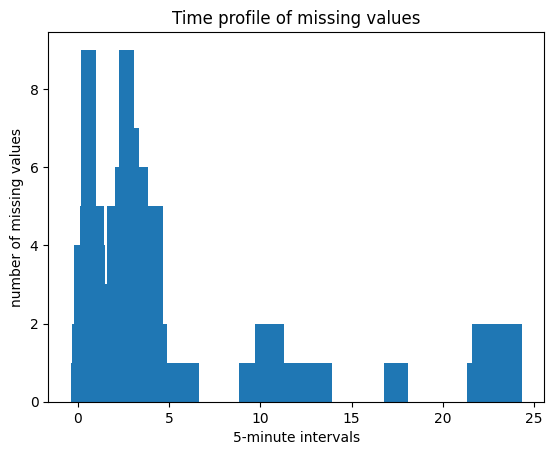

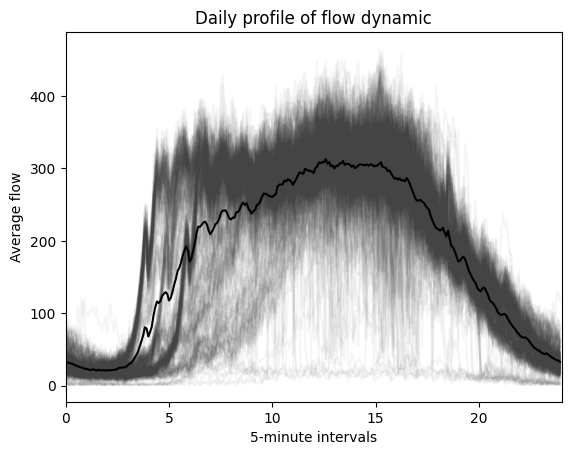

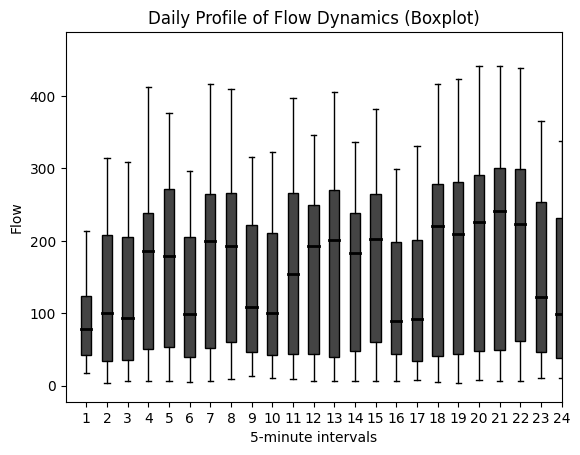

In [3]:
nans_per_time = np.sum(np.isnan(vectorized_day_dataset),0)

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
x_axis = np.arange(0, nintvals, 1, dtype=int)
x_axis_hours = []
for i in range(0, len(x_axis)):
  x_axis_hours.append(float(x_axis[i]*5)/60)
ax.bar(x_axis_hours,height=nans_per_time)


ax.set_ylabel('number of missing values')
ax.set_xlabel('5-minute intervals')
ax.set_title('Time profile of missing values')

plt.show()

nans_per_day = np.sum(np.isnan(vectorized_day_dataset),1)
fig, ax = plt.subplots()
ax.plot(np.array([x_axis_hours,]*ndays).transpose(),vectorized_day_dataset.transpose(),color='#444444',alpha=0.05)
ax.plot(x_axis_hours,np.transpose(np.nanmean(vectorized_day_dataset,0)),color='black')

ax.set_ylabel('Average flow')
ax.set_xlabel('5-minute intervals')
plt.xlim(0,24)
ax.set_title('Daily profile of flow dynamic')

plt.show()

fig, ax = plt.subplots()

boxplot = ax.boxplot(vectorized_day_dataset.T, patch_artist=True)

for patch in boxplot['boxes']:
    patch.set_facecolor('#444444')
for median in boxplot['medians']:
    median.set(color='black', linewidth=2)

ax.set_ylabel('Flow')

ax.set_xlabel('5-minute intervals')

plt.xlim(0, 24)

ax.set_title('Daily Profile of Flow Dynamics (Boxplot)')

plt.show()

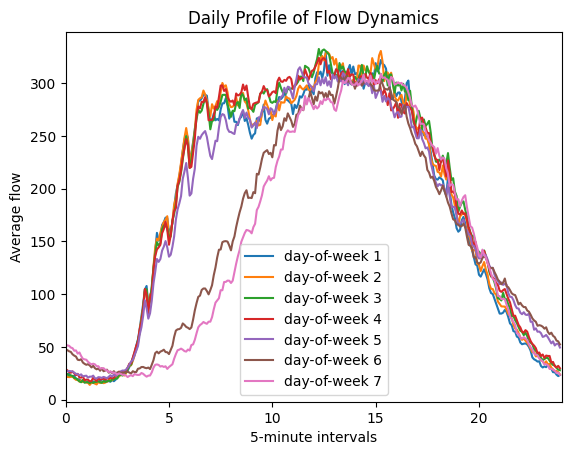

In [4]:
import datetime

day_of_week = np.zeros((ndays))

for i in range(0, ndays):
    day_dt = datetime.datetime.strptime(str(days[i]), '%Y%m%d')
    day_of_week[i] = day_dt.isoweekday()

fig, ax = plt.subplots()

for i in range(1, 8):
    day_of_week_index_t = np.where(day_of_week == i)
    ndays_t = np.size(day_of_week_index_t[0])
    ax.plot(x_axis_hours,
            np.nanmean(vectorized_day_dataset[day_of_week_index_t[0], :].transpose(), 1),
            label='day-of-week ' + str(i))

ax.set_ylabel('Average flow')
ax.set_xlabel('5-minute intervals')
plt.xlim(0, 24)
ax.set_title('Daily Profile of Flow Dynamics')
ax.legend()
plt.show()

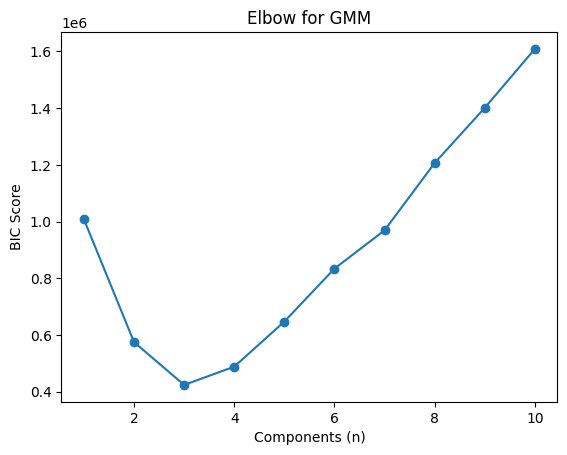

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

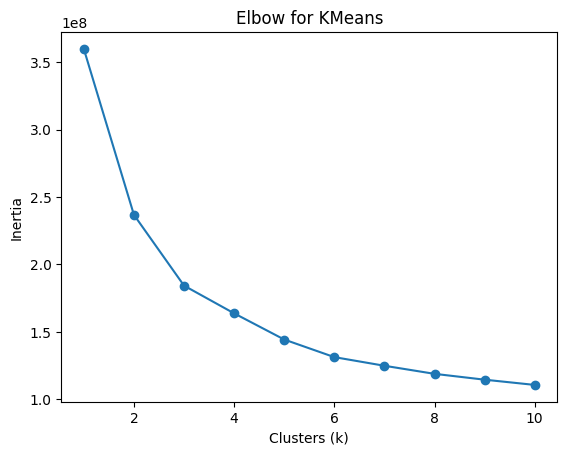

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and wi

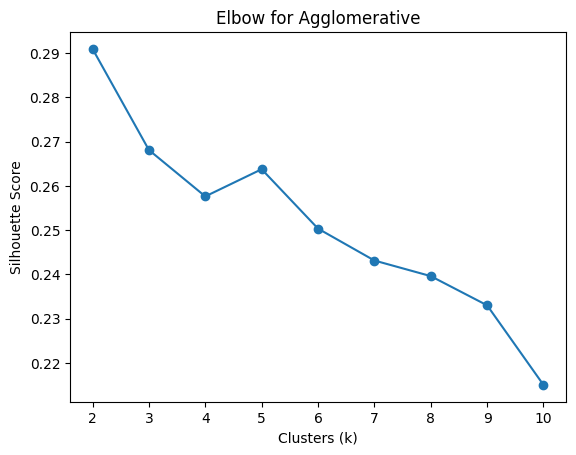

In [109]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
X = vectorized_day_dataset[np.where(nans_per_day == 0)[0],:]

bic_scores = []
range_n_components = range(1, 11)

for n in range_n_components:
    gmm = GaussianMixture(n_components=n, covariance_type='full', random_state=42)
    gmm.fit(X)
    bic_scores.append(gmm.bic(X))

plt.plot(range_n_components, bic_scores, marker='o')
plt.xlabel('Components (n)')
plt.ylabel('BIC Score')
plt.title('Elbow for GMM')
plt.show()

inertia = []
range_n_clusters = range(1, 11)

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range_n_clusters, inertia, marker='o')
plt.xlabel('Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow for KMeans')
plt.show()

silhouette_scores = []
range_n_clusters = range(2, 11)

for k in range_n_clusters:
    agg_clustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
    labels = agg_clustering.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Elbow for Agglomerative')
plt.show()

In [102]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

#n_clusters = 3
clusters = None
vectorized_day_dataset_no_nans = vectorized_day_dataset[np.where(nans_per_day == 0)[0],:]
days_not_nans = days[np.where(nans_per_day == 0)[0]]

clusters1 = KMeans(
    n_clusters=3,
    random_state=42,
    n_init="auto",
    init='random',
    algorithm='elkan',
    tol=1e-6,
    copy_x=True
    ).fit(vectorized_day_dataset_no_nans) # check the parameters at https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
clusters2 = AgglomerativeClustering(
    n_clusters=4,
    metric='cosine',
    linkage='complete',
    compute_full_tree=True,
    compute_distances=True
    ).fit(vectorized_day_dataset_no_nans) # check the parameters at https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
clusters3 = DBSCAN(
    eps=500,
    min_samples = 2,
    metric = 'euclidean',
    leaf_size = 30,
    algorithm='brute',
    p=2,
    n_jobs=-1
    ).fit(vectorized_day_dataset_no_nans) # check the parameters at https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

cluster_labels4 = GaussianMixture(
    n_components=3,
    covariance_type='full',
    random_state=42
    ).fit(vectorized_day_dataset_no_nans).predict(vectorized_day_dataset_no_nans) #check the parameters at  https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_init.html#sphx-glr-auto-examples-mixture-plot-gmm-init-py

if clusters1 is not None:
  cluster_labels1 = clusters1.labels_
if clusters2 is not None:
  cluster_labels2 = clusters2.labels_
if clusters3 is not None:
  cluster_labels3 = clusters3.labels_

print(cluster_labels1)
print(cluster_labels2)
print(cluster_labels3)
print(cluster_labels4)


[2 2 2 0 0 2 0 0 2 2 0 0 0 0 0 2 2 0 0 0 0 0 2 2 0 0 0 0 2 2 0 0 0 0 0 2 2
 0 0 0 0 0 2 2 0 0 0 0 2 2 0 0 0 0 2 2 0 0 0 0 0 2 2 0 0 0 0 0 2 2 0 0 0 0
 0 2 2 0 0 0 0 0 2 0 0 2 2 2 2 0 0 0 0 2 2 0 0 0 0 0 2 2 0 0 0 0 0 2 2 0 0
 0 0 0 2 2 1 1 1 1 1 0 2 1 1 1 0 1 2 2 1 1 0 2 1 1 1 1 1 0 0 1 1 1 1 1 0 2
 1 1 1 1 1 0 0 1 1 1 1 1 0 2 1 1 1 1 2 2 2 1 1 1 1 1 0 2 1 1 1 2 2 1 1 1 1
 1 2 2 1 0 0 0 0 2 2 1 0 2 2 1 1 1 1 2 2 1 1 1 1 1 0 2 1 1 1 1 1 0 2 1 1 1
 1 1 0 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 2 1 1 1 0 0
 1 1 1 1 1 0 2 1 1 1 1 1 0 0 1 1 1 1 0 2 1 1 1 1 2 2 1 1 1 1 2 2 1 1 1 1 1
 2 2 1 0 1 1 1 2 2 1 1 1 0 0 2 2 1 0 1 0 2 2 1 1 1 1 1 2 2 1 0 0 0 2 2 2 2
 0 0 0 2]
[2 2 2 0 0 2 0 0 2 2 0 0 0 0 0 2 2 0 0 0 0 0 2 2 0 0 0 0 2 2 0 0 0 0 0 2 2
 0 0 0 0 0 2 2 0 0 0 0 2 2 0 0 0 0 2 2 0 0 0 0 0 2 2 0 0 0 0 0 2 2 0 0 0 0
 0 2 2 0 0 0 0 0 2 0 0 2 2 2 2 0 0 0 0 2 2 0 0 0 0 0 2 2 0 0 0 0 0 2 2 0 0
 0 0 0 2 0 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0
 1 1 1 1 1 0 0 

In [103]:
from dateutil.relativedelta import relativedelta
from matplotlib.patches import Polygon
from matplotlib.lines import Line2D
from matplotlib import gridspec
from matplotlib.patches import Patch
from matplotlib import colors

def assign_colors(n_clusters, days, assigments):

    days_colors = []
    color_to_cluster = []
    style_to_cluster = []
    weekend_colors = ['#67001f','#d6604d','#fdae61','#f46d43','#d53e4f','#9e0142','#f768a1','#f1c232']#,'#fe9929','#cc4c02','#e31a1c','#737373','#bdbdbd','#252525','#bcbddc']
#    weekend_school_colors = ['#c2a5cf','#f1b6da','#8e0152','#c51b7d','#de77ae','#ae017e','#fcc5c0','#e31a1c','#737373','#bdbdbd']
#    bank_holidays_colors = ['#543005','#dfc27d','#bf812d','#8c510a']
    mixed_colors = ['#4d4d4d','#35978f','#bababa','#878787']
    weekday_colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#cab2d6','#6a3d9a','#b15928','#8dd3c7','#bebada','#fb8072','#b3de69','#bc80bd','#fccde5','#ccebc5','#35978f','#80cdc1']

    cluster_id_weekdays_share = []
    cluster_id_weekend_share = []
    cluster_id_all_days = []

    for i in range(0,n_clusters):
        color_to_cluster.append(None)
        style_to_cluster.append(None)
        cluster_id_weekdays_share.append(0)
        cluster_id_weekend_share.append(0)
        cluster_id_all_days.append(0)

    for i in range(0,len(days)):
        #print(i,assigments[i],len(assigments),len(cluster_id_all_days))
        if assigments[i] is not None:
            cluster_id_all_days[assigments[i]] += 1
            if '-' in str(days[i]):
                pomT = datetime.datetime.strptime(str(days[i]),'%Y-%m-%d')
            else:
                pomT = datetime.datetime.strptime(str(days[i]),'%Y%m%d')

            if int(pomT.weekday()) < 5:
                cluster_id_weekdays_share[assigments[i]] += 1
            else:
                cluster_id_weekend_share[assigments[i]] += 1

    print('cluster_id_weekdays_share',cluster_id_weekdays_share)
    print('cluster_id_weekend_share',cluster_id_weekend_share)
    for i in range(0,len(days)):
        if assigments[i] is not None:
            cluster_idx = assigments[i]
            if '-' in str(days[i]):
                pomT = datetime.datetime.strptime(str(days[i]),'%Y-%m-%d')
            else:
                pomT = datetime.datetime.strptime(str(days[i]),'%Y%m%d')
            if color_to_cluster[assigments[i]] is None:
                if cluster_id_weekend_share[cluster_idx] / float(cluster_id_all_days[cluster_idx]) > 0.6:
                        color_to_cluster[assigments[i]] = weekend_colors.pop()
                        style_to_cluster[assigments[i]] = ':'
                elif cluster_id_weekdays_share[cluster_idx] / float(cluster_id_all_days[cluster_idx]) > 0.6:
                        color_to_cluster[assigments[i]] = weekday_colors.pop(0)
                        style_to_cluster[assigments[i]] = '-'
                else:
                    color_to_cluster[assigments[i]] = mixed_colors.pop()
                    style_to_cluster[assigments[i]] = ':'

            days_colors.append(color_to_cluster[assigments[i]])
        else:
            days_colors.append(None)

    return days_colors,color_to_cluster,style_to_cluster


def calmap(ax, year, data, days, assigments, n_clusters,days_colors,color_to_cluster,
           limit_graphics=False):

    ax.tick_params('x', length=0, labelsize="medium", which='major')
    ax.tick_params('y', length=0, labelsize="x-small", which='major')

    # Month borders

    xticks, labels = [], []
    start = datetime.datetime(year,1,1).weekday()

    for month in range(1,13):

        first = datetime.datetime(year, month, 1)
        last = first + relativedelta(months=1, days=-1)

        y0 = first.weekday()
        y1 = last.weekday()
        x0 = (int(first.strftime("%j"))+start-1)//7
        x1 = (int(last.strftime("%j"))+start-1)//7

        P = [ (x0,   y0), (x0,    7),  (x1,   7),
              (x1,   y1+1), (x1+1,  y1+1), (x1+1, 0),
              (x0+1,  0), (x0+1,  y0) ]

        xticks.append(x0 +(x1-x0+1)/2)
        labels.append(first.strftime("%b"))
        poly = Polygon(P, edgecolor="black", facecolor="None",

                       linewidth=1, zorder=20, clip_on=False)

        ax.add_artist(poly)

    line = Line2D([0,53],[5,5],linewidth=1, zorder = 20,color="black",linestyle='dashed')
    ax.add_artist(line)

    if not limit_graphics:
        ax.set_xticks(xticks)
        ax.set_xticklabels(labels)
        ax.set_yticks(0.5 + np.arange(7))
        ax.set_yticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
        ax.set_title("{}".format(year), weight="semibold")
    else:
        plt.tick_params(
            axis='x',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False)
        plt.tick_params(
            axis='y',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            left=False,      # ticks along the bottom edge are off
            right=False,         # ticks along the top edge are off
            labelleft=False)

    # Clearing first and last day from the data
    valid = datetime.datetime(year, 1, 1).weekday()
    data[:valid,0] = np.nan
    valid = datetime.datetime(year, 12, 31).weekday()
    # data[:,x1+1:] = np.nan
    data[valid+1:,x1] = np.nan

    for i in range(0,len(days)):
        if '-' in str(days[i]):
            pomT = datetime.datetime.strptime(str(days[i]),'%Y-%m-%d')
        else:
            pomT = datetime.datetime.strptime(str(days[i]),'%Y%m%d')
        week_number = int(pomT.strftime("%W"))
        day_of_week = int(pomT.weekday())
        data[day_of_week,week_number] = assigments[i]


    act_date = datetime.datetime(year,1,1)
    while (act_date.year == year):

        week_number = int(act_date.strftime("%W"))
        day_of_week = int(act_date.weekday())
        doy_id = act_date.timetuple().tm_yday
        if doy_id<5 and week_number > 53:
            week_number = 0

        act_date = act_date + datetime.timedelta(days=1)

    #pomT = datetime.datetime.strptime('2017-01-01','%Y-%m-%d')
    #week_number = int(pomT.strftime("%V"))
    #day_of_week = int(pomT.weekday())
    #print(week_number,day_of_week)
    #doy_id = pomT.timetuple().tm_yday
    #if doy_id<5 and week_number > 0:
    #    week_number = 0
    #data[day_of_week,week_number] = len(clusters)+10

    # Showing data
    cmap = plt.cm.spring  # Can be any colormap that you want after the cm
    cmap.set_bad(color='white')

    #ax.imshow(data, extent=[0,53,0,7], zorder=10, vmin=0, vmax=len(clusters)+10,
    #          cmap=cmap, origin="lower", alpha=.75)

    cmap = colors.ListedColormap(color_to_cluster)
    bounds=[-0.1]
    step = 1
    for i in range(0,n_clusters):
        bounds.append(i-0.1+step)
    norm = colors.BoundaryNorm(bounds, cmap.N)
    #print(color_to_cluster)
   #print(bounds)
    #print(norm)

    #print(color_to_cluster)
    #print(bounds)
    #print(cmap)
    #exit(0)

    ax.imshow(data, extent=[0,53,0,7], zorder=10, interpolation='nearest', origin='lower',cmap=cmap, norm=norm)

def make_calendar_visualization_figure(days,assigments,n_clusters,years,days_colors,color_to_cluster,
                                       save_figure: str = None, show_figure:bool = True, limit_graphics = False):

    fig = plt.figure(figsize=(8,1.5*len(years)), dpi=100)
    X = np.linspace(-1,1, 53*7)

    for i, obj in enumerate(years):

        pom_s = str(len(years))+'1'+str(i+1)
        print(pom_s)

        ax = plt.subplot(int(pom_s), xlim=[0, 53], ylim=[0, 7], frameon=False, aspect=1)
        I = 1.2 - np.cos(X.ravel()) + np.random.normal(0,.2, X.size)
        I = I.reshape(53,7).T
        I.fill(np.nan)
        calmap(ax, int(obj), I.reshape(53,7).T, days, assigments, n_clusters,days_colors,color_to_cluster, limit_graphics)

    #   ax = plt.subplot(212, xlim=[0,53], ylim=[0,7], frameon=False, aspect=1)
    #  I = 1.1 - np.cos(X.ravel()) + np.random.normal(0,.2, X.size)
    #   calmap(ax, 2018, I.reshape(53,7).T)

    #ax = plt.subplot(313, xlim=[0,53], ylim=[0,7], frameon=False, aspect=1)
    #I = 1.0 - np.cos(X.ravel()) + np.random.normal(0,.2, X.size)
    #calmap(ax, 2019, I.reshape(53,7).T)
    if save_figure:
        plt.savefig(save_figure)

    if show_figure or save_figure is None:
        plt.tight_layout()
        plt.show()


def make_figure_centroids(x,y,color_to_cluster,style_to_cluster,cluster_ids,minY = None,maxY = None,
                          save_figure: str = None, show_figure:bool = True):

    #print(color_to_cluster)
    fig = plt.figure(figsize=(8,3))
    ax = fig.add_subplot(111)
    for i in range(0,len(x)):
        #print(i,color_to_cluster[i],style_to_cluster[i])
        #print(y[i])
        ax.plot(x[i],y[i],style_to_cluster[i], color=color_to_cluster[i], label=str(cluster_ids[i]))
    ax.set_xlabel('Time of day')
    ax.set_ylabel('Flow')
    if minY is not None and maxY is not None:
        ax.set_ylim([minY, maxY])
    plt.legend()

    if save_figure:
        plt.savefig(save_figure)

    if show_figure or save_figure is None:
        plt.tight_layout()
        plt.show()

cluster_id_weekdays_share [94, 134, 8]
cluster_id_weekend_share [26, 0, 75]
cluster_id_weekdays_share [87, 142, 6, 1]
cluster_id_weekend_share [47, 0, 52, 2]
cluster_id_weekdays_share [2, 37, 3, 32, 14, 3, 145]
cluster_id_weekend_share [44, 0, 35, 0, 0, 0, 22]
cluster_id_weekdays_share [93, 135, 8]
cluster_id_weekend_share [33, 0, 68]
111


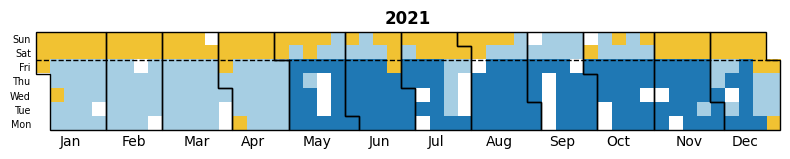

111


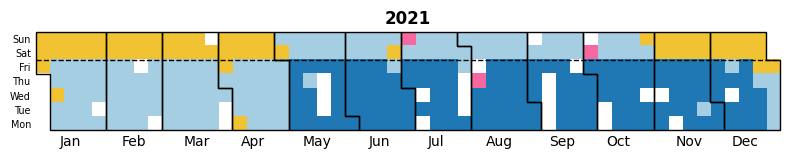

111


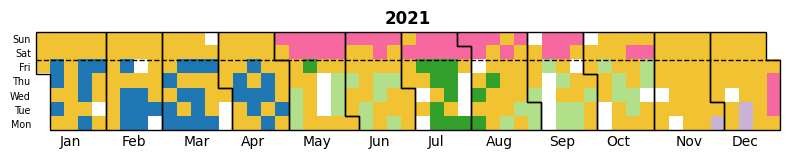

111


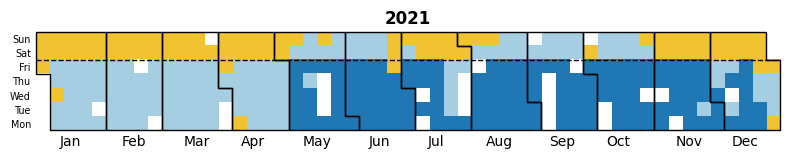

In [104]:
n_clusters_t1 = len(np.unique(cluster_labels1))
n_clusters_t2 = len(np.unique(cluster_labels2))
n_clusters_t3 = len(np.unique(cluster_labels3))
n_clusters_t4 = len(np.unique(cluster_labels4))

days_colors1, color_to_cluster1, style_to_cluster1 = assign_colors(n_clusters_t1, days_not_nans, cluster_labels1)
days_colors2, color_to_cluster2, style_to_cluster2 = assign_colors(n_clusters_t2, days_not_nans, cluster_labels2)
days_colors3, color_to_cluster3, style_to_cluster3 = assign_colors(n_clusters_t3, days_not_nans, cluster_labels3)
days_colors4, color_to_cluster4, style_to_cluster4 = assign_colors(n_clusters_t4, days_not_nans, cluster_labels4)

make_calendar_visualization_figure(days_not_nans, cluster_labels1, n_clusters_t1, [2021], days_colors1,
                                   color_to_cluster1, save_figure=None)
make_calendar_visualization_figure(days_not_nans, cluster_labels2, n_clusters_t2, [2021], days_colors2,
                                   color_to_cluster2, save_figure=None)
make_calendar_visualization_figure(days_not_nans, cluster_labels3, n_clusters_t3, [2021], days_colors3,
                                   color_to_cluster3, save_figure=None)
make_calendar_visualization_figure(days_not_nans, cluster_labels4, n_clusters_t4, [2021], days_colors4,
                                   color_to_cluster4, save_figure=None)

<ipython-input-105-61373feaf092>:22: RuntimeWarning: Mean of empty slice
  centroid_yy = list(np.nanmean(vectorized_day_dataset_no_nans[np.where(cluster_labels3 == i)[0], :], 0).transpose())


IndexError: list index out of range

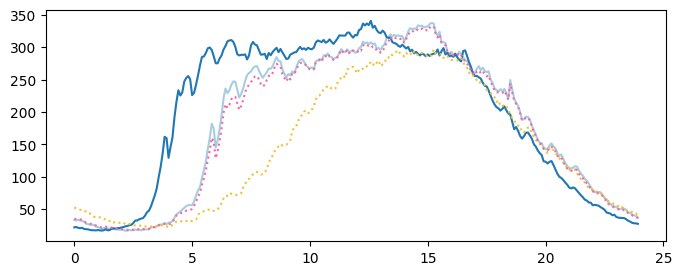

In [105]:
centroids_xx = []
centroids_yy_daytypes = []
cluster_ids = []

for i in range(0, n_clusters_t1):
    centroids_xx.append(x_axis_hours)

    centroid_yy = list(np.nanmean(vectorized_day_dataset_no_nans[np.where(cluster_labels1 == i)[0], :], 0).transpose())
    centroids_yy_daytypes.append(centroid_yy)

    cluster_ids.append(i)
for i in range(0, n_clusters_t2):
    centroids_xx.append(x_axis_hours)

    centroid_yy = list(np.nanmean(vectorized_day_dataset_no_nans[np.where(cluster_labels2 == i)[0], :], 0).transpose())
    centroids_yy_daytypes.append(centroid_yy)

    cluster_ids.append(i)
for i in range(0, n_clusters_t3):
    centroids_xx.append(x_axis_hours)

    centroid_yy = list(np.nanmean(vectorized_day_dataset_no_nans[np.where(cluster_labels3 == i)[0], :], 0).transpose())
    centroids_yy_daytypes.append(centroid_yy)

    cluster_ids.append(i)

make_figure_centroids(centroids_xx, centroids_yy_daytypes, color_to_cluster2, style_to_cluster2, cluster_ids)

In [100]:
from sklearn.metrics import calinski_harabasz_score, silhouette_score, davies_bouldin_score

SC_score1 = silhouette_score(vectorized_day_dataset_no_nans, cluster_labels1)
SC_score2 = silhouette_score(vectorized_day_dataset_no_nans, cluster_labels2)
SC_score3 = silhouette_score(vectorized_day_dataset_no_nans, cluster_labels3)
SC_score4 = silhouette_score(vectorized_day_dataset_no_nans, cluster_labels4)

DB_score1 = davies_bouldin_score(vectorized_day_dataset_no_nans, cluster_labels1)
DB_score2 = davies_bouldin_score(vectorized_day_dataset_no_nans, cluster_labels2)
DB_score3 = davies_bouldin_score(vectorized_day_dataset_no_nans, cluster_labels3)
DB_score4 = davies_bouldin_score(vectorized_day_dataset_no_nans, cluster_labels4)

CH_score1 = calinski_harabasz_score(vectorized_day_dataset_no_nans, cluster_labels1)
CH_score2 = calinski_harabasz_score(vectorized_day_dataset_no_nans, cluster_labels2)
CH_score3 = calinski_harabasz_score(vectorized_day_dataset_no_nans, cluster_labels3)
CH_score4 = calinski_harabasz_score(vectorized_day_dataset_no_nans, cluster_labels4)

print('Silhouette Score KMeans:', SC_score1)
print('Davies-Bouldin Score KMeans:', DB_score1)
print('Calinski-Harabasz Score KMeans:', CH_score1)
print('Silhouette Score Agglomerative:', SC_score2)
print('Davies-Bouldin Score Agglomerative:', DB_score2)
print('Calinski-Harabasz Score Agglomerative:', CH_score2)
print('Silhouette Score DBSCAN:', SC_score3)
print('Davies-Bouldin Score DBSCAN:', DB_score3)
print('Calinski-Harabasz Score DBSCAN:', CH_score3)
print('Silhouette Score GMM:', SC_score4)
print('Davies-Bouldin Score GMM:', DB_score4)
print('Calinski-Harabasz Score GMM:', CH_score4)

Silhouette Score KMeans: 0.2692406087798076
Davies-Bouldin Score KMeans: 1.3587890766043182
Calinski-Harabasz Score KMeans: 159.13421302277044
Silhouette Score Agglomerative: 0.32576971673572114
Davies-Bouldin Score Agglomerative: 0.8285272807208052
Calinski-Harabasz Score Agglomerative: 87.27999934470593
Silhouette Score DBSCAN: -0.02772100330028316
Davies-Bouldin Score DBSCAN: 2.3795720914163345
Calinski-Harabasz Score DBSCAN: 35.327906331751436
Silhouette Score GMM: 0.27185300874582446
Davies-Bouldin Score GMM: 1.3476341945253456
Calinski-Harabasz Score GMM: 159.1202986950757


In [106]:
import sklearn.metrics.pairwise as dis_lib

data_eval_df = pd.read_csv("evaluation_dataset_exercise_5_clustering_highway_traffic.csv", sep=";")
data_eval_df.sort_values(["Date", "Interval_5"])
days_eval = np.unique(data_eval_df[['Date']].values.ravel())
ndays_eval = len(days_eval)
day_eval_subsets_df = data_eval_df.groupby(["Date"])

vectorized_day_dataset_eval = np.zeros((ndays_eval, nintvals))
vectorized_day_dataset_eval.fill(np.nan)

for i in range(0, ndays_eval):
    df_t = day_eval_subsets_df.get_group(days_eval[i])

    for j in range(len(df_t)):
        df_t = day_eval_subsets_df.get_group(days_eval[i])
        vectorized_day_dataset_eval[i, df_t.iloc[j]["Interval_5"]] = df_t.iloc[j]["flow"]

print(vectorized_day_dataset_eval)
print('Number of NaNs:', np.sum(np.isnan(vectorized_day_dataset_eval)))
print('Rate of NaNs:', np.sum(np.isnan(vectorized_day_dataset_eval)) / (ndays_eval * nintvals))

nans_per_day_eval = np.sum(np.isnan(vectorized_day_dataset_eval), 1)
print('Number of days with missing values:', np.size(np.where(nans_per_day_eval > 0)))

vectorized_day_dataset_no_nans_eval = vectorized_day_dataset_eval[np.where(nans_per_day_eval == 0)[0], :]
days_not_nans_eval = days_eval[np.where(nans_per_day_eval == 0)[0]]

print('Final number of days in evaluation dataset:', len(days_not_nans_eval))
print('List of days without missing values:', days_not_nans_eval)
ndays_eval_not_nans = len(days_not_nans_eval)

def find_the_closest_centroid(centroids, new_day, from_interval: int, to_interval: int):
    closest_centroid = None
    closest_dist = None

    for i in range(0, len(centroids)):
        ed_t = dis_lib.paired_distances(centroids[i], new_day, metric='euclidean')
        if closest_centroid is None or closest_dist > ed_t:
            closest_centroid = i
            closest_dist = ed_t

    return closest_centroid

centroids = []

for i in np.unique(cluster_labels2):
    centroid = np.nanmean(vectorized_day_dataset_no_nans[np.where(cluster_labels2 == i)[0], :], 0).reshape(1, nintvals)
    centroids.append(centroid)

n_past_intervals_for_classification = 5
total_mae = 0
total_mape = 0
prediction_counts = 0

for i in range(0, ndays_eval_not_nans):
    for j in range(n_past_intervals_for_classification, nintvals - 1):
        centroid_index = find_the_closest_centroid(centroids, vectorized_day_dataset_no_nans_eval[i].reshape(1, nintvals), j - n_past_intervals_for_classification, j)
        predicted_value = centroids[centroid_index][0, j + 1]

        mae_t = abs(predicted_value - vectorized_day_dataset_no_nans_eval[i][j + 1])
        mape_t = abs(predicted_value - vectorized_day_dataset_no_nans_eval[i][j + 1]) / float(vectorized_day_dataset_no_nans_eval[i][j + 1])

        total_mae += mae_t
        total_mape += mape_t
        prediction_counts += 1

print('Prediction accuracy MAE:', total_mae / prediction_counts)
print('Prediction accuracy MAPE:', total_mape / prediction_counts)

[[35. 29. 32. ... 62. 66. 71.]
 [44. 44. 51. ... 30. 31. 23.]
 [21. 22. 17. ... 20. 22. 22.]
 ...
 [17. 17. 20. ... 35. 25. 27.]
 [37. 25. 30. ... 37. 36. 49.]
 [42. 28. 32. ... 45. 49. 38.]]
Number of NaNs: 96
Rate of NaNs: 0.004166666666666667
Number of days with missing values: 11
Final number of days in evaluation dataset: 69
List of days without missing values: [20220108 20220109 20220131 20220204 20220209 20220210 20220211 20220223
 20220226 20220227 20220302 20220304 20220305 20220306 20220310 20220314
 20220315 20220321 20220323 20220326 20220403 20220406 20220416 20220418
 20220421 20220422 20220425 20220427 20220428 20220503 20220505 20220514
 20220519 20220521 20220522 20220526 20220530 20220601 20220603 20220609
 20220616 20220619 20220623 20220628 20220704 20220711 20220712 20220904
 20220910 20220911 20220920 20220921 20220925 20220927 20220929 20220930
 20221005 20221022 20221024 20221114 20221116 20221121 20221122 20221213
 20221216 20221218 20221220 20221223 20221230]
